## **Creating environment to use Kaggle API**

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

## **Downloading the Dataset**

In [ ]:
!kaggle datasets download -d odins0n/ucf-crime-dataset

100% 11.0G/11.0G [01:35<00:00, 154MB/s]
100% 11.0G/11.0G [01:35<00:00, 124MB/s]


## **Importing the Dataset**

In [ ]:
!unzip ucf-crime-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Train/Vandalism/Vandalism035_x264_230.png  
  inflating: Train/Vandalism/Vandalism035_x264_240.png  
  inflating: Train/Vandalism/Vandalism035_x264_250.png  
  inflating: Train/Vandalism/Vandalism035_x264_260.png  
  inflating: Train/Vandalism/Vandalism035_x264_270.png  
  inflating: Train/Vandalism/Vandalism035_x264_280.png  
  inflating: Train/Vandalism/Vandalism035_x264_290.png  
  inflating: Train/Vandalism/Vandalism035_x264_30.png  
  inflating: Train/Vandalism/Vandalism035_x264_300.png  
  inflating: Train/Vandalism/Vandalism035_x264_310.png  
  inflating: Train/Vandalism/Vandalism035_x264_320.png  
  inflating: Train/Vandalism/Vandalism035_x264_330.png  
  inflating: Train/Vandalism/Vandalism035_x264_340.png  
  inflating: Train/Vandalism/Vandalism035_x264_350.png  
  inflating: Train/Vandalism/Vandalism035_x264_360.png  
  inflating: Train/Vandalism/Vandalism035_x264_370.png  
  inflating: Train/Vandalism/Vandalism

## **Importing** **Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import DenseNet121
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, MaxPooling2D, Conv2D, Flatten
from tensorflow.keras.models import Sequential
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

## **TRAINING AND TESTING DATA SEPERATION**

In [ ]:
train_dir = "/content/Train"
test_dir = "/content/Test"
SEED = 12
IMG_HEIGHT = 64
IMG_WIDTH = 64
BATCH_SIZE = 256
EPOCHS = 2
LR = 0.00003
crime_types=os.listdir(train_dir)
n=len(crime_types)
print("Number of crime categories : ",n)

Number of crime categories :  14


## **Visualization of the Dataset**

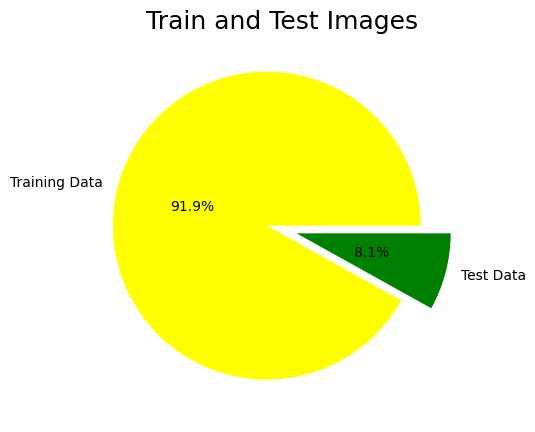

In [ ]:
crimes={}
train=test=0
for clss in crime_types:
    num=len(os.listdir (os.path.join(train_dir,clss)))
    train+=num
    test+=len(os.listdir (os.path.join(test_dir,clss)))
    crimes[clss]=num


plt.figure(figsize=(8, 5))
plt.pie(x=np.array([train, test]), autopct="%.1f%%", explode=[0.1, 0.1], labels=["Training Data", "Test Data"], pctdistance=0.5,colors=["yellow", "green"])
plt.title("Train and Test Images", fontsize=18);

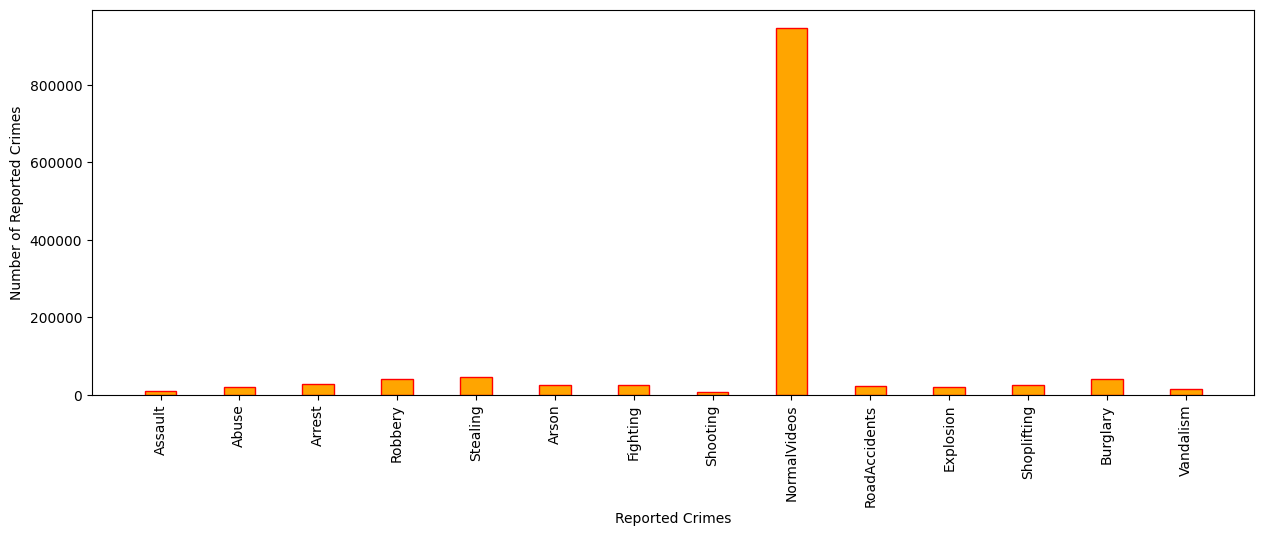

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(list(crimes.keys()), list (crimes.values()), width=0.4, align="center",edgecolor=["red"],color=["orange"])
plt.xticks(rotation=90)


plt.xlabel("Reported Crimes")
plt.ylabel("Number of Reported Crimes")
plt.show()


## **TRAIN SET ,TEST SET AND VAL SET**

In [ ]:
IMG_SHAPE=(64,64)
#Apply Image_Dataset_from_directory Functionality To Train Set And Test Set
train_set=image_dataset_from_directory(
    train_dir,
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    image_size=IMG_SHAPE,
    shuffle=True,
    seed=SEED,
    validation_split=0.2,
    subset="training",
)



val_set=image_dataset_from_directory(
    train_dir,
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    image_size=IMG_SHAPE,
    shuffle=True,
    seed=SEED,
    validation_split =0.2,
    subset="validation",
)


test_set=image_dataset_from_directory(
    test_dir,
    label_mode="categorical",
    class_names=None,
    batch_size=BATCH_SIZE,
    image_size=IMG_SHAPE,
    shuffle=False,
    seed=SEED,
)


Found 1266345 files belonging to 14 classes.
Using 1013076 files for training.
Found 1266345 files belonging to 14 classes.
Using 253269 files for validation.
Found 111308 files belonging to 14 classes.


## **Adding Dense** **Layers**

In [ ]:
# Adding Dense Layers

def create_model():
    model=Sequential()

    base_model=transfer_learning()
    model.add(base_model)

    model.add(GlobalAveragePooling2D())

    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.2))

    model.add(Dense(512, activation="relu"))
    model.add(Dropout (0.2))

    model.add(Dense(1024, activation="relu"))

    model.add(Dense (n, activation="softmax"))

    model.summary()

    return model


## **Create Transfer Learning Function**

In [ ]:
# Create Transfer Learning Function
INPUT_SHAPE=(64,64,3)
def transfer_learning():
    base_model=DenseNet121(include_top=False, input_shape=INPUT_SHAPE, weights="imagenet")

    thr=149

    for layers in base_model.layers[:thr]:
        layers.trainable=False

    for layers in base_model.layers[thr:]:
        layers.trainable=False

    return base_model




model=create_model()

model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

29084464/29084464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 2, 2, 1024)        7037504   
                                                                 
 global_average_pooling2d (  (None, 1024)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0 

In [ ]:
# Configure The Learning Process

model=create_model()

model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 2, 2, 1024)        7037504   
                                                                 
 global_average_pooling2d_1  (None, 1024)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_4 (Dense)             (None, 256)               262400    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               131584    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                      

## **Training the Model**

In [ ]:
# Train The Model
history = model.fit(x = train_set,
                    validation_data=val_set,
                    epochs = 2)

Epoch 1/2
3958/3958 [==============================] - 1583s 393ms/step - loss: 0.3262 - accuracy: 0.9114 - val_loss: 0.0961 - val_accuracy: 0.9738
Epoch 2/2
3958/3958 [==============================] - 1403s 354ms/step - loss: 0.1510 - accuracy: 0.9563 - val_loss: 0.0611 - val_accuracy: 0.9839


## **Saving the Model**

In [ ]:
# Save model
model.save('crime.h5')

## **Loading the saved model using load_model**

In [ ]:
#Load the saved model using load_model

from tensorflow.keras.models import load_model
model=load_model('crime.h5')

In [ ]:
model.load_weights('crime.h5')

## **y_prediction**

In [ ]:
y_true = np.array([])
for x, y in test_set:
    y_true = np.concatenate([y_true, np.argmax(y.numpy(), axis=-1)])


y_pred=model.predict(test_set)

435/435 [==============================] - 50s 110ms/step


In [ ]:
from tensorflow.keras.preprocessing import image

# Testing 1
img = image.load_img("/content/Test/Burglary/Burglary005_x264_1030.png",target_size=(64,64)) # Reading image
x = image.img_to_array(img) # Converting Image into array
x = np.expand_dims(x,axis=0) # expanding Dimensions
pred = np.argmax (model.predict(x)) # Predicting the higher probablity Index
op = ['Fighthing', 'Arrest', 'Vandalism', 'Assault', 'Stealing' , 'Arson', 'Normalvideos', 'Burglary', 'Explosion', 'Robbery','Abuse', 'shooting', 'Shoplifting', 'RoadAccident']
op[pred] # tist indexing with output

1/1 [==============================] - 3s 3s/step


'Burglary'

In [ ]:
# Testing 2
img = image.load_img("/content/Test/Fighting/Fighting003_x264_1020.png",target_size=(64,64)) # Reading image
x = image.img_to_array(img) # Converting Image into array
x = np.expand_dims(x,axis=0) # expanding Dimensions
pred = np.argmax (model.predict(x)) # Predicting the higher probablity Index
op = ['Fighthing', 'Arrest', 'Vandalism', 'Assault', 'Stealing' , 'Arson', 'Normalvideos', 'Burglary', 'Explosion', 'Robbery','Abuse', 'shooting', 'Shoplifting', 'RoadAccident']
op[pred] # tist indexing with output

1/1 [==============================] - 0s 56ms/step


'Burglary'